In [21]:
# check prophet version
import fbprophet
# print version number
print('Prophet %s' % fbprophet.__version__)

Prophet 0.6


In [22]:
# load the car sales dataset
#from pandas import read_csv
import pandas as pd
# load data
#path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
#df = read_csv(path, header=0)

df=pd.read_excel('Total(marriot).xlsx', index_col='TS', parse_dates=True, dtype={'Value':float})
df.drop(['Unnamed: 0','Unnamed: 0.1', 'Time', 'Max Value','Date'], axis=1, inplace=True)
# summarize shape
print(df.shape)
# show first few rows
print(df.head())

(53567, 1)
                      Value
TS                         
2019-03-01 00:15:00  135.12
2019-03-01 00:30:00  131.28
2019-03-01 00:45:00  129.60
2019-03-01 01:00:00  126.48
2019-03-01 01:15:00  123.36


In [23]:
print(df.tail())

                      Value
TS                         
2020-09-08 22:45:00  157.68
2020-09-08 23:00:00  153.60
2020-09-08 23:15:00  149.04
2020-09-08 23:30:00  143.52
2020-09-08 23:45:00  139.44


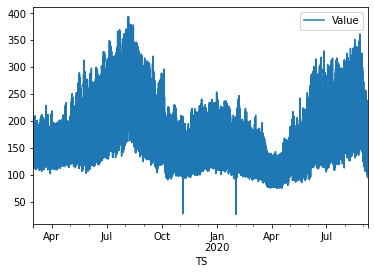

In [24]:
from matplotlib import pyplot

df.plot()
pyplot.show()

In [ ]:
'''
# load and plot the car sales dataset
from pandas import read_csv
from matplotlib import pyplot
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
# plot the time series
df.plot()
pyplot.show()
'''

In [27]:
df_day=df.resample(rule='1H').sum()
df_day=df_day.reset_index()
#df_day.columns
df_day.rename(columns={'TS':'ds','Value':'y'},inplace=True)

In [ ]:
df_day.head()

In [ ]:
df_day.tail()

In [28]:
df_day.describe()

,y
count,13392.000000
mean,752.334014
std,251.345105
min,302.400000
25%,554.160000
50%,714.480000
75%,899.760000
max,1558.560000


In [ ]:
df_day=df.resample(rule='D').sum()
df_day=df_day.reset_index()
#df_day.columns
df_day.rename(columns={'TS':'ds','Value':'y'},inplace=True)

In [ ]:
df_day.tail()

In [ ]:
from fbprophet import Prophet
from pandas import to_datetime
'''
# fit prophet model on the car sales dataset
from pandas import read_csv

from fbprophet import Prophet
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
'''
# prepare expected column names
df_day.columns = ['ds', 'y']
df_day['ds']= to_datetime(df_day['ds'])
# define the model
model = Prophet()
# fit the model
model.fit(df_day)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
Initial log joint probability = -4.39613
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes
      99       270.121    0.00413718       75.7289           1           1      120
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes
     179       270.265    0.00019681       84.1622   2.169e-06       0.001      273  LS failed, Hessian reset
     199       270.283   1.38947e-05       87.8642      0.3402           1      299
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes
     240       270.296    1.6343e-05       89.9117   1.953e-07       0.001      381  LS failed, Hessian reset
     299         270.3   4.73573e-08       74.9719      0.3914           1      455
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes
     300         270.3   8.25604e-09       74.4478      0.3522      0.3522      456
Optimization terminated normally:
  Convergence detected: absolute parameter change was below tolerance

In [ ]:
'''# make an in-sample forecast
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from matplotlib import pyplot
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
# define the model
model = Prophet()
# fit the model
model.fit(df)
'''
# define the period for which we want a prediction


In [ ]:
from pandas import DataFrame

future = list()
for i in range(9, 15):
	date = '2020-09-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()

In [ ]:
'''
# make an out-of-sample forecast
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from matplotlib import pyplot
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
# define the model
model = Prophet()
# fit the model
model.fit(df)
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '1969-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()
'''

In [ ]:
# evaluate prophet time series forecasting model on hold out dataset
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot
# load data
#path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
#df = read_csv(path, header=0)
# prepare expected column names
#df.columns = ['ds', 'y']
#df['ds']= to_datetime(df['ds'])
# create test dataset, remove last 12 months
train = df_day.drop(df_day.index[-7:])
print(train.tail())
# define the model
model = Prophet()
# fit the model
model.fit(train)
# define the period for which we want a prediction
future = list()
for i in range(9, 16):
	date = '2020-09-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds'] = to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# calculate MAE between expected and predicted values for december
y_true = df_day['y'][-7:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [ ]:
future

In [ ]:
y_true

In [ ]:
forecast.yhat

In [ ]:
forecast